In [1]:
%matplotlib inline
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
pic = pd.read_pickle('HW3.pkl')
pic_names = list(pic.columns)
pic_array = []
for name in pic_names:
    pic_array.append(pic[name][0])

(343, 512, 3)


'\ncv_red = cv_pic[:,:,2]\ncv_red_expand = np.zeros(cv_pic.shape)\ncv_red_expand[:,:,2] = cv_red\ncv2.imwrite(pic_names[index]+"_red.jpg",cv_red_expand)\n'

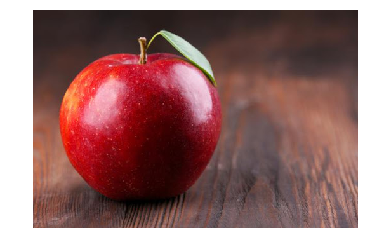

In [2]:
#for index in range(len(pic_names)):
index = random.randint(0,len(pic_names)-1)
plt.figure()
plt.axis('off')
plt.imshow(pic_array[index])
print(pic_array[index].shape)
cv_pic = cv2.cvtColor(pic_array[index],cv2.COLOR_RGB2BGR)
cv2.imwrite(pic_names[index]+".jpg",cv_pic)
'''
cv_red = cv_pic[:,:,2]
cv_red_expand = np.zeros(cv_pic.shape)
cv_red_expand[:,:,2] = cv_red
cv2.imwrite(pic_names[index]+"_red.jpg",cv_red_expand)
'''

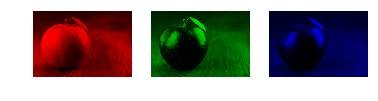

In [3]:
R_channel = []
G_channel = []
B_channel = []
#for index in range(len(pic_names)):
plt.figure()
_,plot = plt.subplots(1,3)
for color in range(3):
    back_img = pic_array[index].copy()
    plot[color].axis('off')
    if color == 0:
        back_img[:,:,1] = 0
        back_img[:,:,2] = 0
        plot[0].imshow(back_img)
        R_channel.append(back_img[:,:,0])
    if color == 1:
        back_img[:,:,0] = 0
        back_img[:,:,2] = 0
        plot[1].imshow(back_img)
        G_channel.append(back_img[:,:,1])
    if color == 2:
        back_img[:,:,0] = 0
        back_img[:,:,1] = 0
        plot[2].imshow(back_img)
        B_channel.append(back_img[:,:,2])

In [4]:
def my_conv(pic,kernel):    #very very slow
    pic_x_size , pic_y_size = pic.shape
    kernel_x_size , kernel_y_size = kernel.shape
    produce_x_size , produce_y_size = pic_x_size-(kernel_x_size-1) , pic_y_size-(kernel_y_size-1)
    result_mat = np.zeros((produce_x_size,produce_y_size))
    for run_x in range(produce_x_size):
        for run_y in range(produce_y_size):
            pixel = 0
            for kernel_run_x in range(kernel_x_size):
                for kernel_run_y in range(kernel_y_size):
                    pixel += pic[run_x+kernel_run_x][run_y+kernel_run_y] * kernel[kernel_run_x][kernel_run_y]
            result_mat[run_x][run_y] = pixel
    result_mat = np.array(result_mat)
    result_mat = np.clip(result_mat,0,255)
    return result_mat
def my_multi_channel_combine(R,G,B):
    combine_size = tuple(list(R.shape) + [3])
    combine_mat = np.zeros(combine_size,dtype=np.uint8)
    combine_mat[:,:,0] = R
    combine_mat[:,:,1] = G
    combine_mat[:,:,2] = B
    return combine_mat

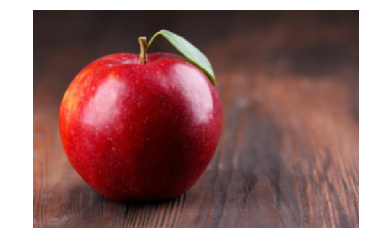

In [5]:
blur_kernel = np.ones((3,3))/9

#for index in range(len(pic_names)):
R_conv = my_conv(R_channel[0],blur_kernel)
G_conv = my_conv(G_channel[0],blur_kernel)
B_conv = my_conv(B_channel[0],blur_kernel)
plt.figure()
plt.axis('off')
plt.imshow(my_multi_channel_combine(R_conv,G_conv,B_conv))

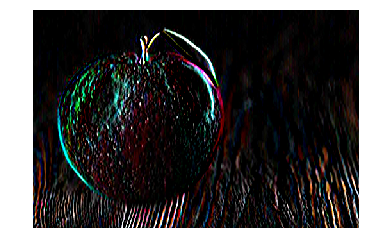

In [6]:
edge_kernel = np.array([[1,1,-1,-1],[1,1,-1,-1],[1,1,-1,-1],[1,1,-1,-1]])

#for index in range(len(pic_names)):
R_conv = my_conv(R_channel[0],edge_kernel)
G_conv = my_conv(G_channel[0],edge_kernel)
B_conv = my_conv(B_channel[0],edge_kernel)
plt.figure()
plt.axis('off')
plt.imshow(my_multi_channel_combine(R_conv,G_conv,B_conv))

In [7]:

'''
* solution 1

from scipy import ndimage
#for index in range(len(pic_names)):
R_conv = ndimage.convolve(R_channel[0], edge_kernel)
G_conv = ndimage.convolve(G_channel[0], edge_kernel)
B_conv = ndimage.convolve(B_channel[0], edge_kernel)
plt.figure()
plt.axis('off')
plt.imshow(my_multi_channel_combine(R_conv,G_conv,B_conv))
'''

"\n* solution 1\n\nfrom scipy import ndimage\n#for index in range(len(pic_names)):\nR_conv = ndimage.convolve(R_channel[0], edge_kernel)\nG_conv = ndimage.convolve(G_channel[0], edge_kernel)\nB_conv = ndimage.convolve(B_channel[0], edge_kernel)\nplt.figure()\nplt.axis('off')\nplt.imshow(my_multi_channel_combine(R_conv,G_conv,B_conv))\n"

In [8]:
'''
* solution 2

plt.imshow(cv2.cvtColor(cv2.filter2D(cv_pic,cv2.CV_8U,edge_kernel),cv2.COLOR_RGB2BGR))
'''

'\n* solution 2\n\nplt.imshow(cv2.cvtColor(cv2.filter2D(cv_pic,cv2.CV_8U,edge_kernel),cv2.COLOR_RGB2BGR))\n'